# Predicting Employee Attrition using Logistic Regression

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

## Introduction

The objective of this project is developing a classifier model to predict employee attrition in a company by using one of the most widely used statistical method that is Logistic Regression. The result of the model may also be used to assess some of the important factors that affect employee attrition. As my previous experience in a Human Resources Department, I have considered this problem to be very interesting and intriguing. However, this problem and the theoretical framework can also serve as a basis and be applied for analytics in other fields.

The dataset is taken from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset, this project is purely educational and not intended for commercial use. All copyright belongs to their respective owners.

## Data cleansing, Exploratory Data Analysis, and Data Transformation

In [2]:
os.chdir(r"F:\Python\Database\HR Analytics")
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking for datatypes
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# Checking for null values
print(data.isnull().sum())

# No Null or NaN values found

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [39]:
# Swapping 'Age' and 'Attrition' columns so that the dependent variable 'Attrition' goes to the front.
swap = ['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
data=data.reindex(columns=swap)

# Showing the dataframe
data


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
# Checking for descriptive statistics of dataframe
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Checking for values in the dependent variable 'Attrition':
yes = len(data[data['Attrition']=='Yes'])
no = len(data[data['Attrition']=='No'])
total = len(data)
prop_yes = yes/total
prop_no = no/total

print(f'The "Yes" values are {yes} and the "No" values are {no}, total rows are {total} records')
print(f'The proportion of "Yes" and "No" values are {prop_yes} and {prop_no} respectively')


The "Yes" values are 237 and the "No" values are 1233, total rows are 1470 records
The proportion of "Yes" and "No" values are 0.16122448979591836 and 0.8387755102040816 respectively


<AxesSubplot:xlabel='Attrition', ylabel='count'>

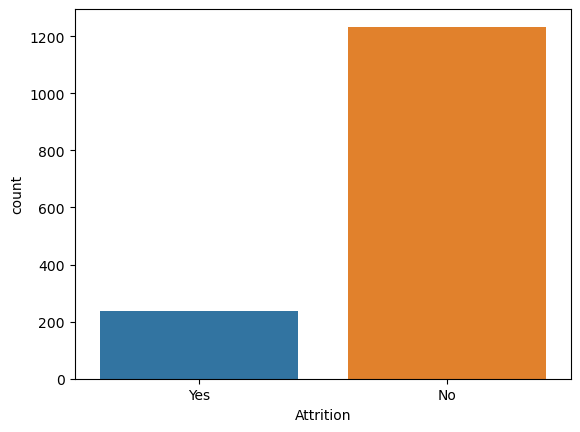

In [8]:
# Showing the countplot of the "Attrition" values.
sns.countplot(data=data,x='Attrition')

It is can be seen that the data are not evenly distributed between the dependent variables (Imbalanced Dataset).
By just random guessing "No", one can easily get correct results of about 83 %

<AxesSubplot:xlabel='Age', ylabel='count'>

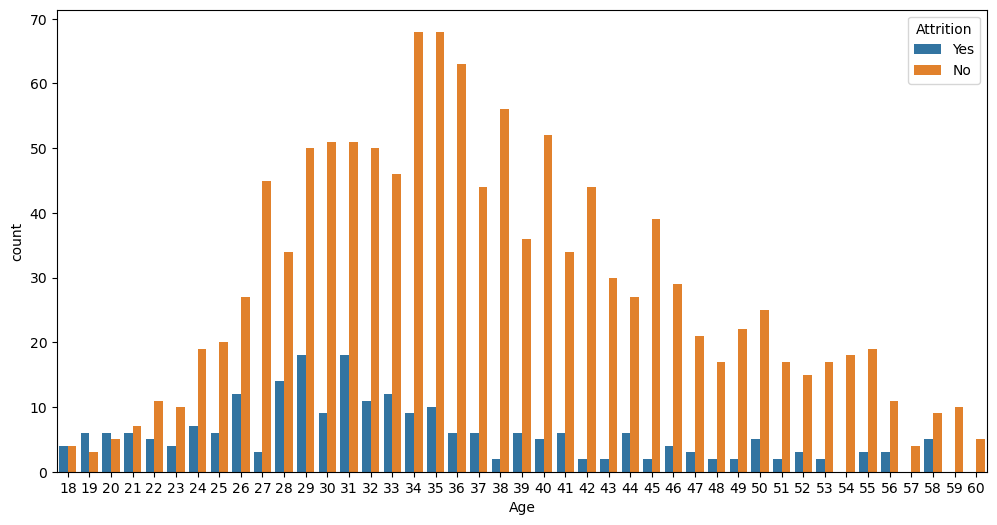

In [9]:
# Checking the shape of dependent "Attrition" variables with respect to "Age"
plt.subplots(figsize=(12,6))
sns.countplot(x='Age',hue='Attrition',data=data)

Based on the above figure, we can infer that attrition happen mostly at age around 29-31 years.

<br>
Converting binary values such as "Yes" or "No" to 1 and 2 respectively. 
For "BusinessTravel", 0 indicates Non-Travel, 1 indicates rarely, 2 indicates frequently.
For genders, 0 indicates male and 1 indicates female.

'Over18', 'StandardHours, and 'EmployeeCount columns contain same values for all rows which are meaningless in the analysis, and thus are dropped.
'EmployeeNumber', 'Department', 'EducationField', 'JobRole', and 'MaritalStatus' columns are also dropped as rather considered irrelevant.

In [10]:
dropped = ['EmployeeNumber', 'StandardHours', 'EmployeeCount', 'Over18','Department', 'EducationField', 'JobRole', 'MaritalStatus']
data2 = data.replace({'Yes':1, 'No':0, 'Non-Travel':0, 'Travel_Rarely':1,'Travel_Frequently':2,'Male':0,'Female':1})
data2 = data2.drop(dropped,axis=1)

In [11]:
# Checking data types of transformed dataframe
data2.dtypes

Attrition                   int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

Checking for outliers within the dataframe. Some outliers are still acceptable to be used in the analysis as long as they are follow common sense.
The steps are:<br>
    1. Identifying binary (nominal) variables, those variables will be excluded from outliers detecting process<br>
    2. Constructing thresholds for outliers, one of the most widely used is using Inter-quartile Range (IQR)<br>
    3. Determining columns that are containing outliers<br>
    


In [12]:
# Determining binary (nominal) variables
binary = []
for i in data2:
    if len(data2[i].unique())==2:
        binary.append(i)
binary

# Apparently, PerformanceRating is only showing 2 unique values i.e. [3,4] even though they are not nominal variable. 
# Nonetheless, it is still unnecessary to include them from outliers detection

['Attrition', 'Gender', 'OverTime', 'PerformanceRating']

In [13]:
# Determining IQR
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1


In [36]:
# Determining columns that are containing outliers by using indexing

index = (((data2.min() < (Q1 - 1.5 * IQR)) | (data2.max() > (Q3 + 1.5 * IQR))) & ~data2.columns.isin(binary))
outliercols = data2.columns[index]
", ".join(outliercols.tolist())

'Age, BusinessTravel, JobInvolvement, PercentSalaryHike, TrainingTimesLastYear, WorkLifeBalance'

In [15]:
# Checking for the values that are outside Inter-quartile Range for each columns (outliers).
((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)

# The 'BusinessTravel' column has the most rows that contain outliers

BusinessTravel              427
TrainingTimesLastYear       238
Attrition                   237
PerformanceRating           226
MonthlyIncome               114
YearsSinceLastPromotion     107
YearsAtCompany              104
StockOptionLevel             85
TotalWorkingYears            63
NumCompaniesWorked           52
YearsInCurrentRole           21
YearsWithCurrManager         14
JobSatisfaction               0
Age                           0
JobLevel                      0
OverTime                      0
PercentSalaryHike             0
JobInvolvement                0
RelationshipSatisfaction      0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
WorkLifeBalance               0
Education                     0
DistanceFromHome              0
DailyRate                     0
MonthlyRate                   0
dtype: int64

In [16]:
# Printing values in the outlier columns to c
for i in outliercols:
    if len(data2[i].unique()) < 5: 
        print(i)
        print(sorted(data2[i].unique(),reverse=True),end='\n\n')
    else:
        print(i)
        print(sorted(data2[i].unique(),reverse=True)[0:5],"...", sorted(data2[i].unique(),reverse=True)[-5:],end='\n\n')

BusinessTravel
[2, 1, 0]

MonthlyIncome
[19999, 19973, 19943, 19926, 19859] ... [1091, 1081, 1052, 1051, 1009]

NumCompaniesWorked
[9, 8, 7, 6, 5] ... [4, 3, 2, 1, 0]

StockOptionLevel
[3, 2, 1, 0]

TotalWorkingYears
[40, 38, 37, 36, 35] ... [4, 3, 2, 1, 0]

TrainingTimesLastYear
[6, 5, 4, 3, 2] ... [4, 3, 2, 1, 0]

YearsAtCompany
[40, 37, 36, 34, 33] ... [4, 3, 2, 1, 0]

YearsInCurrentRole
[18, 17, 16, 15, 14] ... [4, 3, 2, 1, 0]

YearsSinceLastPromotion
[15, 14, 13, 12, 11] ... [4, 3, 2, 1, 0]

YearsWithCurrManager
[17, 16, 15, 14, 13] ... [4, 3, 2, 1, 0]



Based on the outlier detection, it is can be seen that these outliers are still considered to be naturally occuring in real world (workplace condition). Removal of these data points may lead to unrepresentative and biased predictor model.

In [17]:
# Normalizing dataframe using max-min normalization
data2=(data2-data2.min())/(data2.max()-data2.min())

<AxesSubplot:>

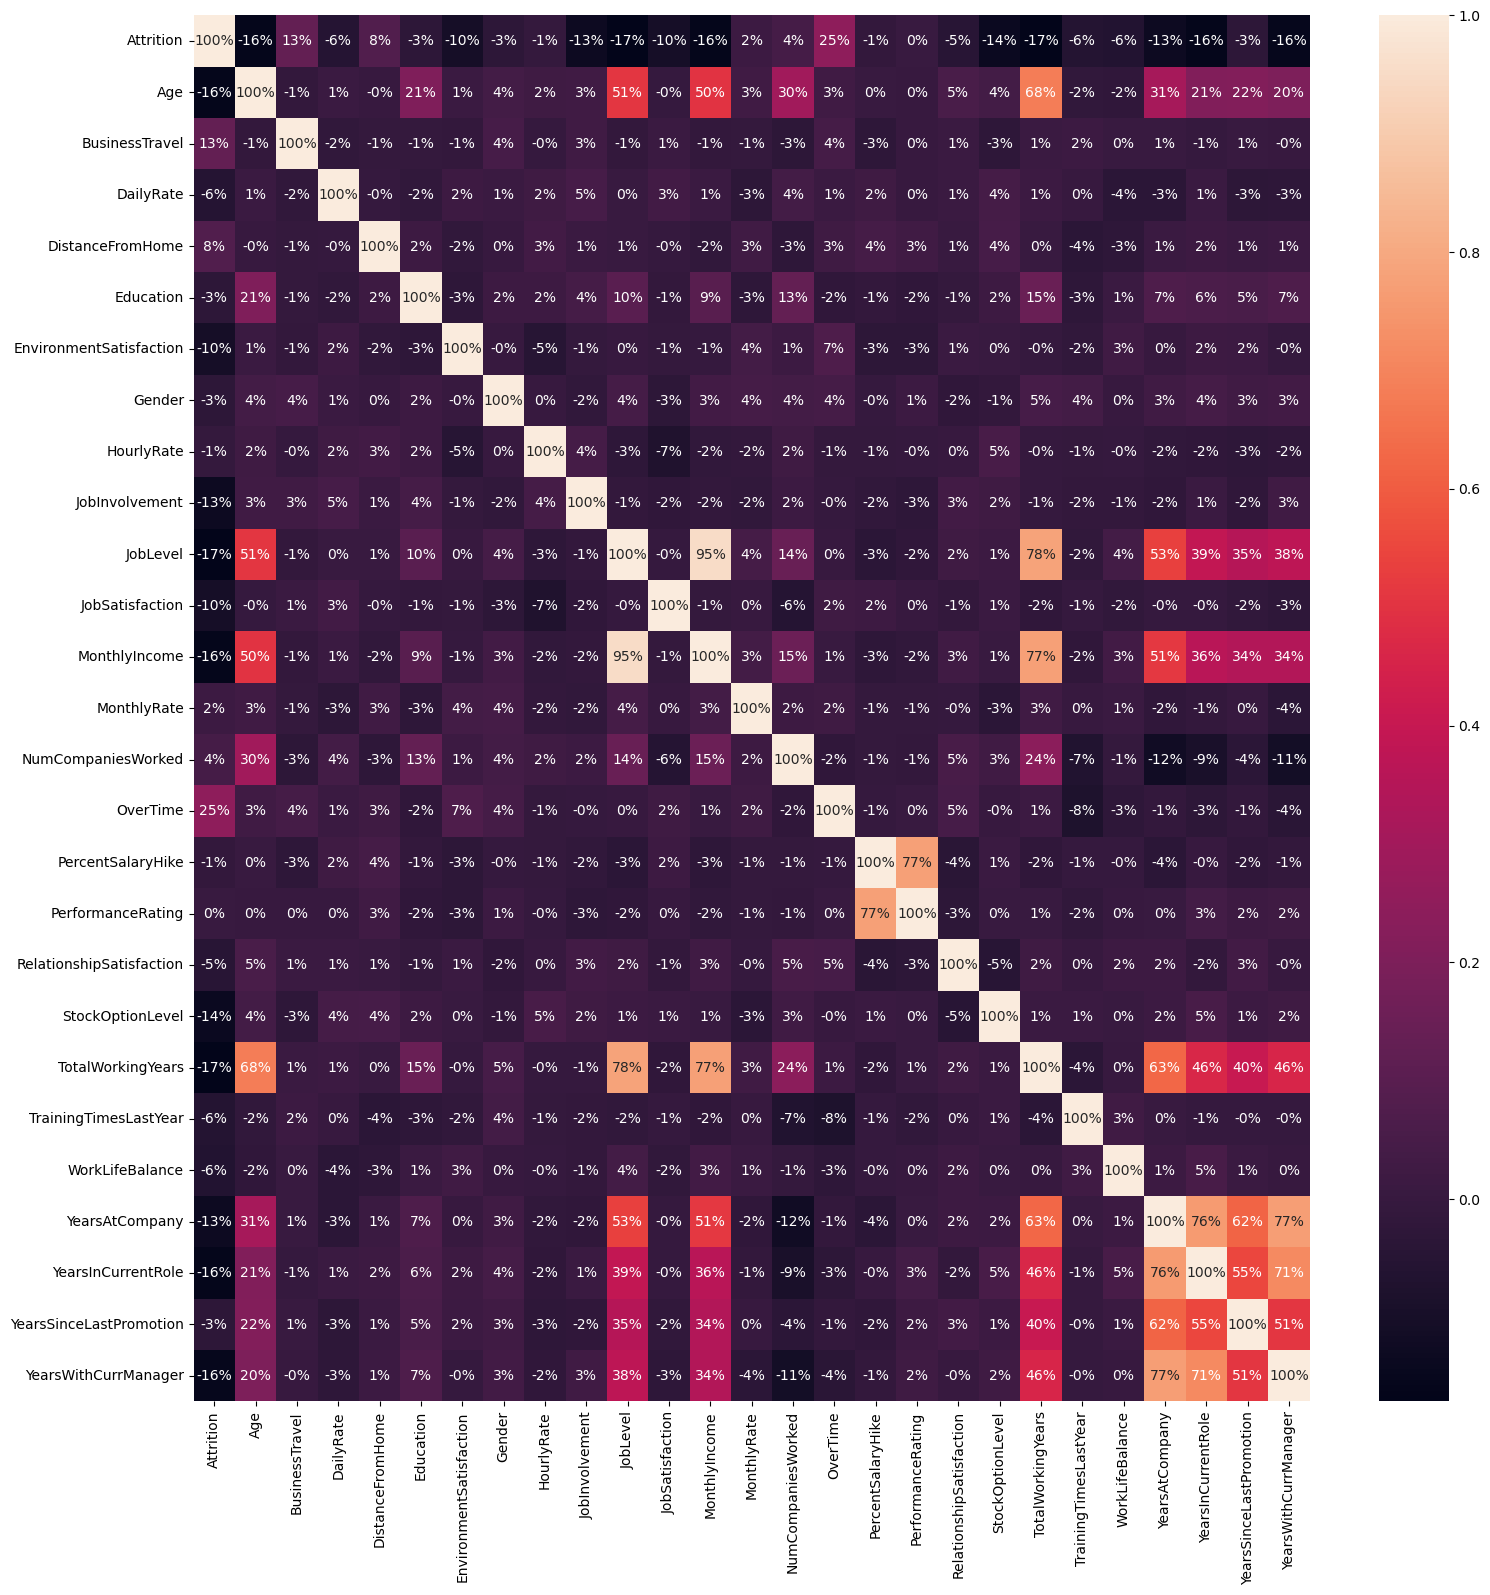

In [18]:
# Calculating correlation for each variables for sanity check. 
plt.figure(figsize=(18,18))
sns.heatmap(data2.corr(), annot = True,fmt='.0%')

It is noteworthy that some variables are closely correlated to other. The examples of relatively strong positive correlation are: 
1. Job Level - Age 
2. Education - Age 
3. Total Working Years - Job Level 
4. Total Working Years - Monthly Income 
5. Attrition - Overtime, etc.

While some examples of relatively strong negative correlation are: 
1. Attrition - Total Working Years 
2. Attrition - Job Level, etc.

In [19]:
# Sanity check by using correlation of all variables against dependent variable 'Attrition'
data2.corrwith(data2['Attrition']).sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
BusinessTravel              0.127006
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
d

## Creating the model

In [20]:
# Splitting the dataframe to dependent variable Y ('Attrition') and independent variables X's
X =  data2.iloc[:,1:].values
Y = data2.iloc[:,0].values

The dataset is divided by using proportion of training set : test set = 0.667 : 0.333 respectively. Other ratio may be applicable and can be compared with this results. Other commonly used ratios are 80:20, 70:20, 75:25, etc.

In [21]:
# Splitting the dataframe into training set and test set in 0.667 : 0.333 proportion respectively
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.333, random_state=42) 


In [40]:
# Importing sklearn logistic regression
from sklearn.linear_model import LogisticRegression

In [23]:
# Instantiating the model, using default settings
logres = LogisticRegression()

In [24]:
# Fitting the model (Training)
logres.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# Creating prediction based on the Logistic Regression model
ypredlogres = logres.predict(X_test)

## Model Evaluation

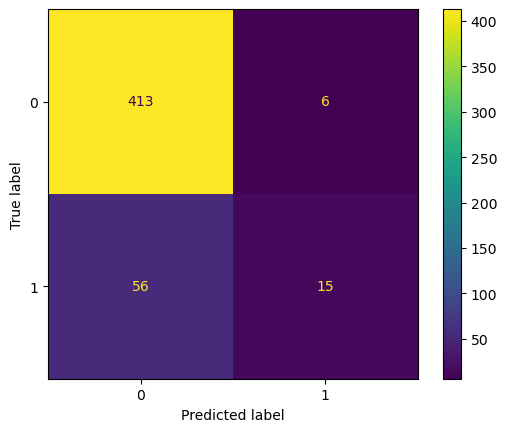

In [26]:
# Visualizing Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,ypredlogres)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Confusion Matrix**

The confusion matrix shows the distribution of each predicted and true labels. For example, the bottom-right quadrant is interpreted of having the "Yes" (1) as predicted class based on the model, and the test set says it is actually indeed belong to "Yes" (1) class. This bottom-right quadrant is called True Positive which having 17 data points. From the top-left, clockwise, the quadrants are called True Negative, False Positive, True Positive, and False Negative respectively.  

**Model Accuracy**

Accuracy score is simply the ratio of correct predictions of the test set (True Positive and True Negative) to entire correct and incorrect guesses (sum of True Positives, True Negatives, False Positives, and False Negatives). By the rule of thumb, higher accuracy score indicates that the model will perform better to new data.


Mathematically, accuracy is defined as:

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Where TP, TN, FP, FN stand for True Positive, True Negative, False Positive, and False Negative respectively.

Based from confusion matrix, accuracy can be calculated as follows:

$Accuracy = \frac{15+413}{15+413+56+6} = 0.873$

There are also other built-in methods from sklearn to generate accuracy score as shown below

In [27]:
# Getting model accuracy by using sklearn .score method
logres.score(X_test, Y_test)

0.8734693877551021

In [28]:
# Or also, accuracy can be computed using sklearn metrics instead, which produces same output
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, ypredlogres)

0.8734693877551021

Based on the accuracy score, either from the Confusion Matrix, .score method, or sklearn metrics, it is can be seen that the model actually improves the value from just randomly guessing "No" (although not that much). 

However, as the data itself is imbalanced, accuracy may not be the best metric for imbalanced data set. These articles https://stephenallwright.com/imbalanced-data-metric/, https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/, https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a provide suggestions on using other metrics such as F1-score, Receiver Operating Characteristics-Area Under the Curve (ROC-AUC), and Matthew's Correlation Coefficient.

In [42]:
# Generating table of coefficients of the logistic regression model

# declaring variables x1, x2, x3, ...
var = ['intercept']
for i in range(1,27):
    var.append(f'x{i}')

# declaring name based on features (data headers)
var_name = ['Bias']
var_name.extend([i for i in data2.columns[1:]])

# returning coefficients from the model (test set)
coefs = logres.intercept_.tolist()+list(logres.coef_[0])

coefs_data = {'Variable':var,
            'Variable Name':var_name,
            'Coefficients':coefs}

coefs_df  = pd.DataFrame(coefs_data)

# Returning coefficients table
coefs_df

,Variable,Variable Name,Coefficients
0,intercept,Bias,0.727020
1,x1,Age,-1.062362
2,x2,BusinessTravel,1.308017
3,x3,DailyRate,-0.210845
4,x4,DistanceFromHome,0.884067
5,x5,Education,0.227763
6,x6,EnvironmentSatisfaction,-0.876566
7,x7,Gender,-0.289694
8,x8,HourlyRate,-0.091113
9,x9,JobInvolvement,-1.545829


In [41]:
# Returning coefficients table with sorted based on absolute values of the coefficients
coefs_df.sort_values('Coefficients',ascending=False)

,Variable,Variable Name,Coefficients
15,x15,OverTime,1.601905
14,x14,NumCompaniesWorked,1.385906
2,x2,BusinessTravel,1.308017
25,x25,YearsSinceLastPromotion,1.165770
4,x4,DistanceFromHome,0.884067
0,intercept,Bias,0.727020
23,x23,YearsAtCompany,0.516664
5,x5,Education,0.227763
16,x16,PercentSalaryHike,0.227090
13,x13,MonthlyRate,0.128369


**Interpretation of the Coefficients**

Based on the table, we can see that top 5 positive coefficients with strongest relationship to Attrition are: <br>
1. Overtime 
2. NumCompaniesWorked
3. BusinessTravel 
4. YearsSinceLastPromotion, and 
5. DistanceFromHome. 
    
The interpretation of such positive coefficients are, the greater value of the coefficient, the more likely the employee will resign, and vice versa. For example, if the employee is having overtime or having more number of previous companies, more likely that they will resign from the current company.

On the other hand, the bottom 5 negative coefficients with strongest relationship to Attrition are: 
1. Total Working Year 
2. JobInvolvement 
3. StockOptionLevel 
4. YearsInCurrentRole, and 
5. Age. 

Contrary to positive coefficients, the negative value will indicate that the more value from dependent variables, the more unlikely they will resign from the current office, and vice versa. For example, if the employee has just worked for a short time, or when they feel better with the current job involment, the more unlikely that they will resign from the company.

Note that unlike linear regression, the coefficient values are not linearly affecting Attrition variable. For example, 1 unit of increase in positive coefficient value does not mean an increase of 1 unit to Attrition variable. That is due to the nature of Logistic Regression put the predictors into sigmoid function. Hence, to measure the direct effect of linear regression, one must perform the inverse of sigmoid function that is applying natural logarithm. But that will be another topic to discuss.

Unfortunately, Sci-kit learn package does not provide comprehensive statistical analysis to determine feature's significance such as p-values and confidence intervals of each variables. In-depth statistical analysis can be done by either using another different package such as Statsmodels, which will be covered in another article.


In [30]:
# Returning some other important metrics
# code adpated from https://towardsdatascience.com/metrics-for-imbalanced-classification-41c71549bbb5


def show_metrics(y_true, y_score):
    # True positive
    tp = np.sum(y_true * y_score)
    # False positive
    fp = np.sum((y_true == 0) * y_score)
    # True negative
    tn = np.sum((y_true==0) * (y_score==0))
    # False negative
    fn = np.sum(y_true * (y_score==0))

    # True positive rate (sensitivity or recall)
    tpr = tp / (tp + fn)
    # False positive rate (fall-out)
    fpr = fp / (fp + tn)
    
    # Baseline
    baseline1 = (tp+fp)/(tp+fp+tn+fn)
    
    # Precision
    precision = tp / (tp + fp)
    # True negatvie tate (specificity)
    tnr = 1 - fpr
    # F1 score
    f1 = 2*tp / (2*tp + fp + fn)
    # ROC-AUC for binary classification
    auc = (tpr+tnr) / 2
    # MCC
    mcc = (tp * tn - fp * fn) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

    print("True positive: ", tp)
    print("False positive: ", fp)
    print("True negative: ", tn)
    print("False negative: ", fn)
    print("Baseline value: ",baseline1)
    print("True positive rate (recall): ", tpr)
    print("False positive rate: ", fpr)
    print("Precision: ", precision)
    print("True negative rate: ", tnr)
    print("F1: ", f1)
    print("ROC-AUC: ", auc)
    print("MCC: ", mcc)
    
show_metrics(Y_test, (ypredlogres > 0.5).astype(int))

True positive:  15.0
False positive:  6
True negative:  413
False negative:  56.0
Baseline value:  0.04285714285714286
True positive rate (recall):  0.2112676056338028
False positive rate:  0.014319809069212411
Precision:  0.7142857142857143
True negative rate:  0.9856801909307876
F1:  0.32608695652173914
ROC-AUC:  0.5984738982822952
MCC:  0.3422876607949132


**Interpretation of Other Important Evaluation Metrics**

Based on the low F1 Score, ROC - AUC score, and the MCC score suggested that this model is inadequate and performed poorly with given dataset. Thus, in further analysis can be used other classifier methods (such as random forest, decision trees, bayesian networks, etc.). Other things that can be done is tweaking the current settings of the model or pre-processing the dataset to find the most imporant features that may significantly affect the dependent variable.

## Conclusions

1. This data set is unusually very clean as it is free from Null/ NaN values, kudos to the contributors
2. The data set dependent variable "Attrition" is not equally distributed. The "Yes" count only 237 out of 1470 data (16%). Just by guessing "No" every time, one can easily get correct results to about 84%
3. Using Interquartile Range criterion, the numerical features that contain outliers data are Age, BusinessTravel, JobInvolvement, PercentSalaryHike, TrainingTimesLastYear, and WorkLifeBalance' with BusinessTravel has the most outliers.
4. 'Overtime' and 'BusinessTravel' have relatively strong correlations with 'Attrition'
5. The dataset is splitted into training set (66.6% of all data) to create the model, and test set (33.4% of all data) to test the model.
5. The accuracy score of the model (against the test set) is 87.3 % which is better than naively guessing 'No'. However, as the dataset is imbalanced, it is inappropriate to use accuracy score as a measure of model performance. Other metrics will be used instead.
6. Top 5 features with strongest positive relations to 'Attrition' are Overtime, NumCompaniesWorked, BusinessTravel, YearsSinceLastPromotion, and DistanceFromHome. An increase in those positive relation will indicate that the employee will likely going to attrition, and vice versa. 
7. Top 5 features with strongest negative relations to 'Attrition' are TotalWorkingYear, JobInvolvement, StockOptionLevel, YearsInCurrentRole, and Age. An increase in those negative relations will indicate that the employee will unlikely going to attrition, and vice versa. Note that the relationships are not linear.
8. Other appropriate metrics to measure imbalanced datasets are F1-score, ROC-AUC, and MCC. The values of those metrics are 32%, 59%, and 34% respectively which are relatively low.
9. Thus, this model does not perform well for this certain dataset. Other viable options are tweaking the sci-kit logistic regression settings, try ing to use other packages, performing feature selection first, or even use other algorithm such as Random Forest, k-Nearest Neighbor, etc.


 